In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [249]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [250]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [252]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])
        print(f"Column {col} , Unique Values {df[col].unique()}")

Column sex , Unique Values [0 1]
Column smoker , Unique Values [1 0]
Column region , Unique Values [3 2 1 0]


<Axes: >

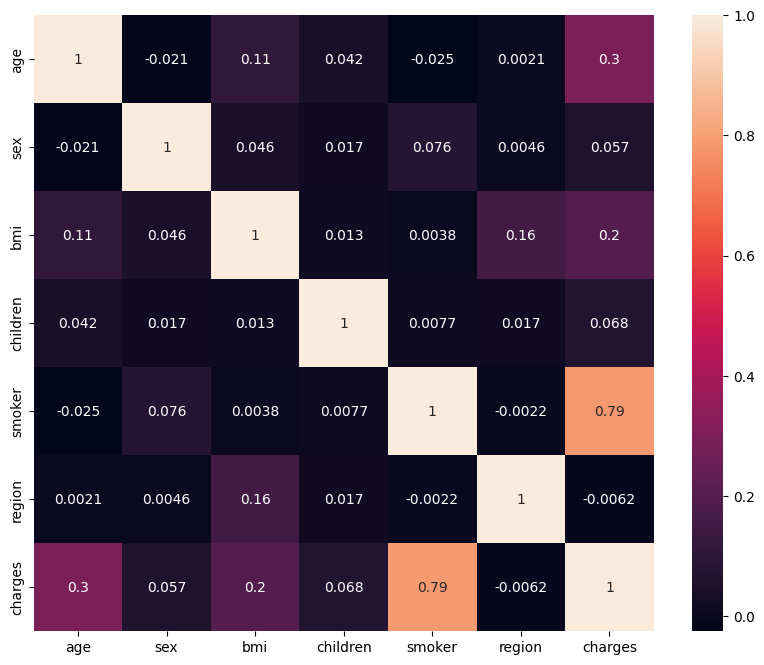

In [253]:
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(df.corr(), annot= True)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

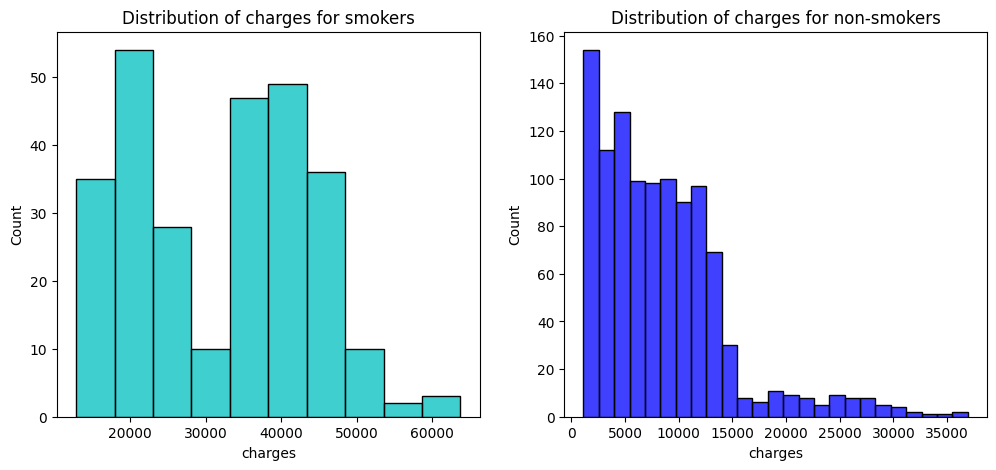

In [254]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

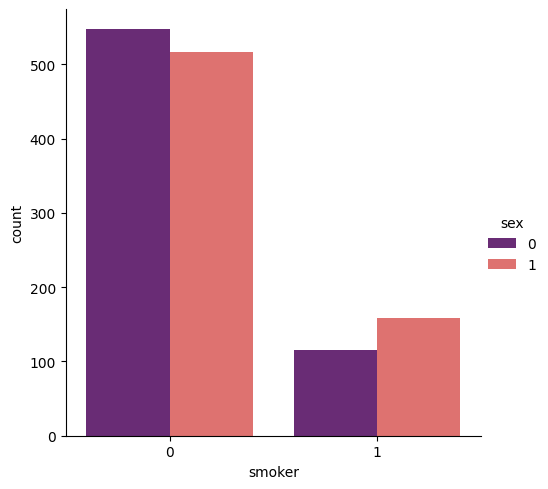

In [255]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="magma", data=df)

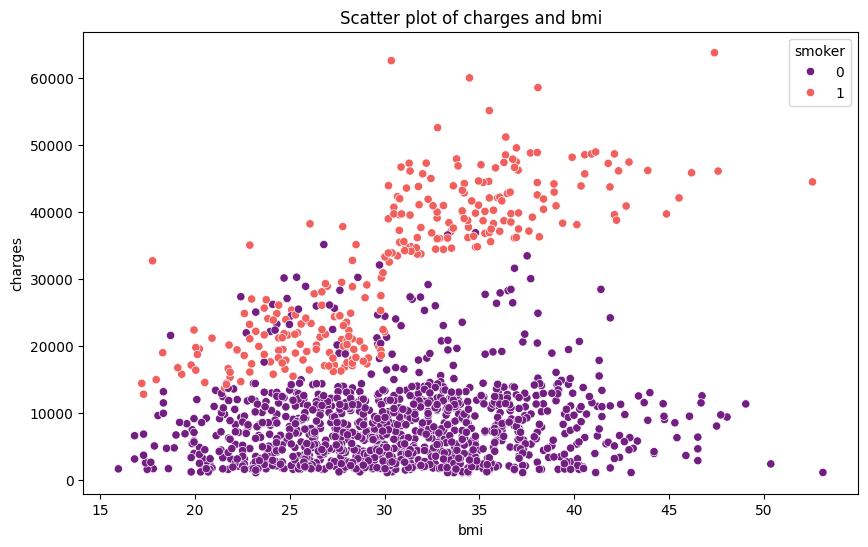

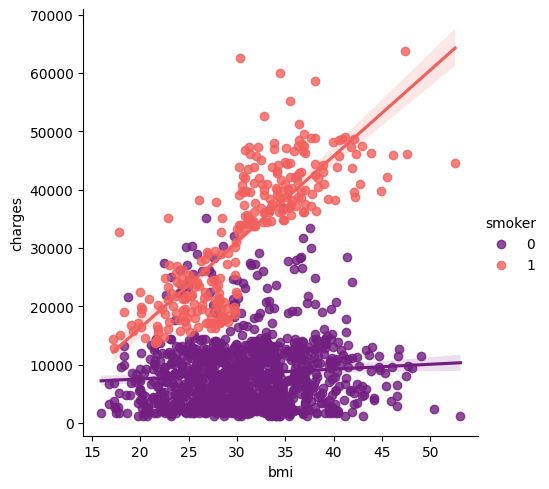

In [256]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma')

#### **X and y**

In [257]:
X = df.drop("charges", axis=1)
y = df["charges"]

#### **train test split**

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

## **Machine Learning Models**

###### Metrics

In [259]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### **Linear Regression**

In [260]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

LinearRegression()

In [261]:
lin_pred = lin_regr.predict(X_test)

In [262]:
print("R2 Score : ", round(r2_score(y_test, lin_pred), 2))
print("MAE : ", round(mean_absolute_error(y_test, lin_pred), 2))
print("RMSE : ", round(np.sqrt(mean_squared_error(y_test, lin_pred)),2))

R2 Score :  0.75
MAE :  3980.07
RMSE :  5872.02


#### **Poynomial Regression**

In [263]:
for degree in range(1, 5):
    poly_conv = PolynomialFeatures(degree=degree, include_bias= False)
    X_poly = poly_conv.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=9)

    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)

    poly_pred = poly_model.predict(X_test)

    print(f"Degree {degree}, R2 Score : ", round(r2_score(y_test, poly_pred), 2))

Degree 1, R2 Score :  0.75
Degree 2, R2 Score :  0.85
Degree 3, R2 Score :  0.83
Degree 4, R2 Score :  0.75


In [264]:
best_conv = PolynomialFeatures(degree=2, include_bias= False)
best_X_poly = best_conv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(best_X_poly, y, test_size=0.3, random_state=9)

best_poly_model = LinearRegression()

best_poly_model.fit(X_train, y_train)
best_poly_pred = best_poly_model.predict(X_test)

print("R2 Score : ", round(r2_score(y_test, best_poly_pred), 2))
print("MAE : ", round(mean_absolute_error(y_test, best_poly_pred), 2))
print("RMSE : ", round(np.sqrt(mean_squared_error(y_test, best_poly_pred)),2))

R2 Score :  0.85
MAE :  2881.55
RMSE :  4575.09


# **Artifical Neural Networks**

In [265]:
scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=9)

### **Building Model**

In [267]:
earlyStopping = EarlyStopping(min_delta=0.005,
                              patience = 20,
                              restore_best_weights = True)

model = Sequential([
    Dense(256, activation="relu", input_dim=6),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dense(1)
])


model.compile(optimizer = "adam", loss="mse", metrics=["mae"])

history = model.fit(X_train, y_train, epochs=200, batch_size = 128, callbacks = [earlyStopping], validation_split=0.2)

Epoch 1/200


C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 313602816.0000 - mae: 13068.9980 - val_loss: 349822624.0000 - val_mae: 14009.2793
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 320283744.0000 - mae: 13106.7637 - val_loss: 349819936.0000 - val_mae: 14009.2451
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 313740384.0000 - mae: 13099.1982 - val_loss: 349815008.0000 - val_mae: 14009.1445
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 303630880.0000 - mae: 12736.9092 - val_loss: 349807648.0000 - val_mae: 14008.9971
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 309000352.0000 - mae: 12853.6152 - val_loss: 349797664.0000 - val_mae: 14008.8115
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 317530976.0000 - mae: 13084.4443 - val_loss: 349784320.0000 - val_mae: 14008.5771
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 328451456.0000 - mae: 13176.7422 - val_loss: 349766016.0000 - val_mae: 14008.2510
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━

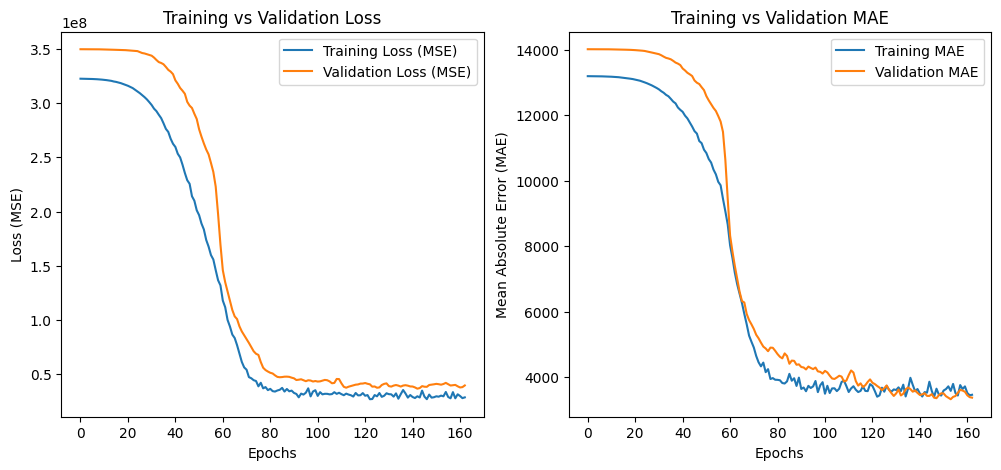

In [268]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss (MSE)")
plt.plot(history.history["val_loss"], label="Validation Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Training vs Validation MAE")
plt.legend()

plt.show()


In [269]:
predicts = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [270]:
print("R2 Score : ", round(r2_score(y_test, predicts), 2))
print("MAE : ", round(mean_absolute_error(y_test, predicts), 2))
print("RMSE : ", round(np.sqrt(mean_squared_error(y_test, predicts)),2))

R2 Score :  0.85
MAE :  2673.48
RMSE :  4637.14
